In [26]:
import pandas as pa
import numpy as np
from pylab import *
import seaborn as sns
sns.set(style="ticks")
from numpy import zeros, sqrt, where, pi, mean, arange, histogram
import bisect
import sys
import urllib.request
from scipy.misc import imread
import numpy as np
import xml.etree.ElementTree as ET
from datetime import datetime,timedelta


# DATA FROM https://data.cityofchicago.org/
# GOOGLE MAPS API KEY --REDACTED --

# MAPS FROM https://developers.google.com/maps/documentation/static-maps/intro
# https://maps.googleapis.com/maps/api/staticmap?center=41.833377580000004,-87.720070432999989&zoom=10&size=400x400

# MAP BOUNDS ACQUIRED USING JSFIDDLE, as below
# HTML
#<script type="text/javascript" src="http://maps.google.com/maps/api/js?sensor=false"></script>
#<div id="GoogleMapControl" style="height: 400px; width: 400px;"></div>
#JS
# var gMap;
# $(document).ready(function() {
#     var latlng = new google.maps.LatLng(41.833377580000004,-87.720070432999989);    
#     var myOptions = {
#         zoom: 10.,
#         center: latlng//,
#         //mapTypeId: google.maps.MapTypeId.ROADMAP
#     };
#     gMap = new google.maps.Map(document.getElementById("GoogleMapControl"), myOptions);
#     google.maps.event.addListenerOnce(gMap, 'idle', function(){
#         alert(this.getBounds());
#     });
# });

# bounds are
latmin=41.628406
latmax=42.03769476
longmin=-87.99473
longmax=-87.445412
# IMAGE IS HERE
img=imread("chicago.png")

red_high = ((0., 0., 0.),
         (.3, .5, 0.5),
         (1., 1., 0.))

blue_middle = ((0., .2, .2),
         (.3, .5, .5),
         (.8, .2, .2),
         (1., .1, .1))

green_none = ((0,0,0),(1,0,0))

cdict3 = {'red':  red_high,
     'green': green_none,
     'blue': blue_middle,
     'alpha': ((0.0, 0.0, 0.0),
               (0.3, 0.5, 0.5),
               (1.0, 1.0, 1.0))    }
from matplotlib.colors import LinearSegmentedColormap
dropout_high = LinearSegmentedColormap('Dropout', cdict3)

In [3]:
# GET DATA FROM WEB
floc="https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD"
urllib.request.urlretrieve(floc, "data.csv")

('data.csv', <http.client.HTTPMessage at 0x7fca9f8ac9b0>)

In [4]:
# LOAD DATA
crimes=pa.read_csv("data.csv")

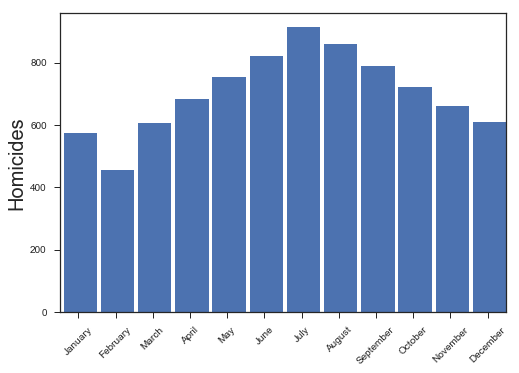

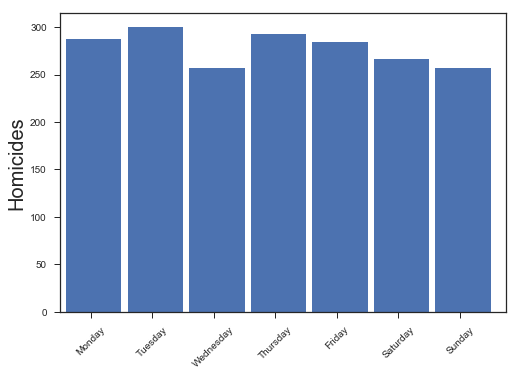

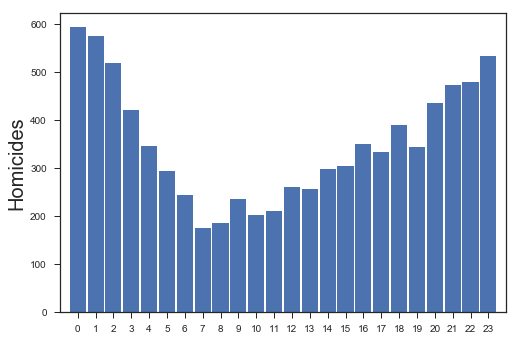

In [23]:
# PROCESS HOMICIDE DATA
homicides=crimes[crimes["Primary Type"]=="HOMICIDE"]
times=[datetime.strptime(i,"%m/%d/%Y %I:%M:%S %p") for i in homicides.Date.values]


# DON'T GO OUT IN JULY
months=[i.month for i in times]
m_labels=["January","February","March","April","May","June","July","August","September","October","November","December"]
plt.bar(np.arange(0.55,11.9,1.0),[months.count(i+1) for i in range(12)],width=0.9)
plt.xlim(0,12)
plt.xticks(np.arange(0.5,12.5,1),m_labels,rotation=45)
plt.ylabel("Homicides",fontsize=20)
plt.show()

# DON'T GO OUT ON TUESDAYS
days=[i.day for i in times]
d_labels=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
plt.bar(np.arange(0.55,6.9,1.0),[days.count(i+1) for i in range(7)],width=0.9)
plt.xlim(0,7.25)
plt.xticks(np.arange(.5,7.5,1),d_labels,rotation=45)
plt.ylabel("Homicides",fontsize=20)
plt.show()

# DON'T GO OUT AT 12 AM
hours=[i.hour for i in times]
plt.bar(np.arange(0,23.01,1),[hours.count(i) for i in range(24)],width=0.9)
plt.xlim(-1,24)
plt.xticks(np.arange(0,23.01,1))
plt.ylabel("Homicides",fontsize=20)
plt.show()


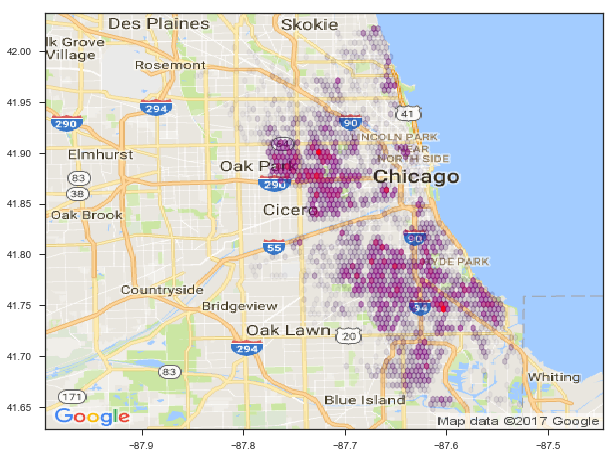

In [33]:
# GET GEOGRAPHICAL INFORMATION
clats=homicides.Latitude.dropna()
clongs=homicides.Longitude.dropna()

# PLOT using HEXBIN againt
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.imshow(img,zorder=0,extent=[longmin,longmax,latmin,latmax])
ax.hexbin(clongs,clats,cmap=dropout_high,gridsize=1000)
ax.set_xlim(longmin,longmax)
ax.set_ylim(latmin,latmax)
plt.show()

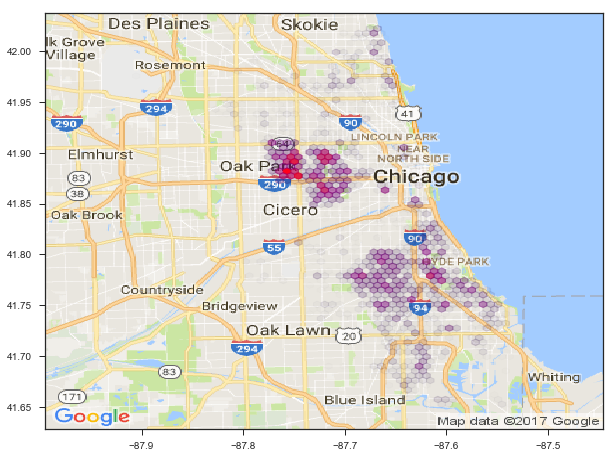

In [32]:
# PROCESS GAMBLING DATA for comparison
gambling=crimes[crimes["Primary Type"]=="GAMBLING"]
# GET GEOGRAPHICAL INFORMATION
clats=gambling.Latitude.dropna()
clongs=gambling.Longitude.dropna()

# PLOT using HEXBIN againt
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.imshow(img,zorder=0,extent=[longmin,longmax,latmin,latmax])
ax.hexbin(clongs,clats,cmap=dropout_high,gridsize=(50,40))
ax.set_xlim(longmin,longmax)
ax.set_ylim(latmin,latmax)
plt.show()